<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4153 entries, 0 to 4152
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Год начала работы      4153 non-null   int64
 1   Уровень оплаты         4153 non-null   int64
 2   Возраст                4153 non-null   int64
 3   Пол                    4153 non-null   int64
 4   Отстранения            4153 non-null   int64
 5   Опыт                   4153 non-null   int64
 6   Увольнение             4153 non-null   int64
 7   Образование_Bachelors  4153 non-null   uint8
 8   Образование_Masters    4153 non-null   uint8
 9   Образование_PHD        4153 non-null   uint8
 10  Город_Bangalore        4153 non-null   uint8
 11  Город_New Delhi        4153 non-null   uint8
 12  Город_Pune             4153 non-null   uint8
dtypes: int64(7), uint8(6)
memory usage: 251.6 KB


ValueError: operands could not be broadcast together with shapes (500,) (499,) 

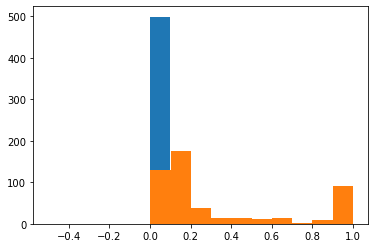

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import ensemble, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
data = pd.read_csv('employee_leave_train.csv').drop('Unnamed: 0', axis = 1)
#предобработка
data['Отстранения'] = data['Отстранения'].apply(lambda x: 1 if x == 'Yes' else 0)
data['Пол'] = data['Пол'].apply(lambda x: 1 if x == 'Male' else 0)
categ_columns = [x for x in data.columns if data[x].dtype == 'object']  #необходимо отметить какие колонки не имею тд числовые
categ_columns
data = pd.get_dummies(data, categ_columns)
data.info()
y = data['Увольнение'] #признак
x = data.drop('Увольнение', axis = 1)#переменная
#модель
linreq = linear_model.LinearRegression()
rf = ensemble.RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=7)
gf = ensemble.GradientBoostingRegressor(n_estimators=70, max_depth=5, min_samples_split=10)
linreq.fit(x,y)
rf.fit(x,y)
gf.fit(x,y)
#тестовая часть
data_test = pd.read_csv('employee_leave_test.csv').drop('Unnamed: 0', axis = 1)
data_test['Отстранения'] = data_test['Отстранения'].apply(lambda x: 1 if x == 'Yes' else 0)
data_test['Пол'] = data_test['Пол'].apply(lambda x: 1 if x == 'Male' else 0)
categ_columns1 = [x for x in data_test.columns if data_test[x].dtype == 'object']  #необходимо отметить какие колонки не имею тд числовые
categ_columns1
data_test = pd.get_dummies(data_test, categ_columns1)
data_test.shape, data.shape
y_test_linreq = linreq.predict(data_test)
y_test_rf = rf.predict(data_test)
y_test_gf = gf.predict(data_test)
y_data_true = np.array(pd.read_csv('sample_submission.csv')).flatten()
plt.hist(y_data_true)
plt.hist(y_test_rf)
#mean_squared_error(y_test_linreq, y_data_true)
k = (200 - sum((y_test_linreq-y_data_true)**2)**0.5)/20
k